# Replicates

check overlap of different brains

In [88]:
# load packages
import numpy as np
import pandas as pd
import napari
import tifffile as tf
from skimage import io # import tiff file as ndarray
import os
import matplotlib.pyplot as plt

# import custum colormaps
from colormaps import *

# import custum functions
from STP_plotting import *
from STP_processing import *

# auto refreshes imported functions if source code changes:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
in_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/norm_subtracted/STeg_220429_aligned/"
out_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/output_figs/"

metadata = pd.read_csv("stp_metadata.csv")

In [11]:
# area list from make_masks.py
areas = ["grey", "CTX", "OMCc", "aud","TH", "STR", "CP", "AMY", "P", "PG", "MB", "PAG", "SCm", 
         "SNr", "HY", "CNU", "TEa", "ECT", "VISC", "AI", "GU", "BS", "HIP"]
steg_masks = []
for i in range(len(areas)):
    with open("/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/masks/STeg_220429_"+areas[i]+".npy", "rb") as f:
            steg_masks.append(np.load(f))
print(len(steg_masks))

22


In [108]:
mmus_masks = []
for i in range(len(areas)):
    with open("/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/masks/MMus_220303_"+areas[i]+".npy", "rb") as f:
            mmus_masks.append(np.load(f))
print(len(mmus_masks))

23


In [13]:
# get file names
dir_list = os.listdir(in_path)
# dir_list

In [14]:
steg_idx = metadata['species'] == "STeg"
steg_meta = metadata[steg_idx]
steg_omc_meta = steg_meta[steg_meta["inj_site"]=="OMC"]
steg_omc_idx = list(steg_omc_meta.index)
for i in steg_omc_idx:
    print(dir_list[i])

OMC_STeg_220208_b0_aligned_to_STeg_220429_norm_subtracted.tif
OMC_STeg_220411_b1_aligned_to_STeg_220429_norm_subtracted.tif
OMC_STeg_220429_b2_aligned_to_STeg_220429_norm_subtracted.tif


In [15]:
metadata['path'] = dir_list
metadata

,brain,species,inj_site,path
0,ACC_MMus_230403_b1,MMus,ACC,ACC_MMus_230403_b1_aligned_to_STeg_220429_norm...
1,ACC_MMus_230404_b2,MMus,ACC,ACC_MMus_230404_b2_aligned_to_STeg_220429_norm...
2,ACC_STeg_230308_b1,STeg,ACC,ACC_STeg_230308_b1_aligned_to_STeg_220429_norm...
3,ACC_STeg_230322_b2,STeg,ACC,ACC_STeg_230322_b2_aligned_to_STeg_220429_norm...
4,ACC_STeg_230501_b3,STeg,ACC,ACC_STeg_230501_b3_aligned_to_STeg_220429_norm...
5,OMC_MMus_220119_b0,MMus,OMC,OMC_MMus_220119_b0_aligned_to_STeg_220429_norm...
6,OMC_MMus_220303_b1,MMus,OMC,OMC_MMus_220303_b1_aligned_to_STeg_220429_norm...
7,OMC_MMus_220324_b2,MMus,OMC,OMC_MMus_220324_b2_aligned_to_STeg_220429_norm...
8,OMC_STeg_220208_b0,STeg,OMC,OMC_STeg_220208_b0_aligned_to_STeg_220429_norm...
9,OMC_STeg_220411_b1,STeg,OMC,OMC_STeg_220411_b1_aligned_to_STeg_220429_norm...


In [97]:
# import images
images = []
for i in range(metadata.shape[0]):
    images.append(tf.imread(in_path+dir_list[i]))
    # images.append(io.imread(in_path+dir_list[i]))
    # print(in_path+dir_list[i])


In [17]:
# import atlas
atlas_path = "/Volumes/Data/Emily/STP_for_MAPseq/4_python_output/input_tifs/Steg_220429_registered_atlas_RESIZED.tif"
atlas = tf.imread(atlas_path)
atlas.shape

(201, 522, 692)

# View and animate 3 Replicates in napari

In [59]:
viewer = napari.Viewer()

In [60]:
colors = ["green", "cyan", "magenta"]
for i in range(len(images)):
    viewer.add_image(
        images[i],
        name=steg_omc_meta.iloc[i, 0],
        scale=[2.5,1,1],
         # contrast_limits=[0,1],
         blending="additive",
        colormap=colors[i]
        )

In [17]:
im_size = images[0].shape[0]
im_size

201

In [12]:
from napari_animation import Animation


In [34]:
# capture scroll through brain
animation = Animation(viewer)

animation.capture_keyframe()

for i in range(200):
    viewer.dims.set_point(0, i*20)
    animation.capture_keyframe()


# animation.animate(out_path+'steg_omc_all.mov', canvas_only=True)
animation.animate(out_path+'steg_all.mp4')

Rendering frames...


100%|██████████| 3001/3001 [01:43<00:00, 28.89it/s]


# Threshold Injection Site

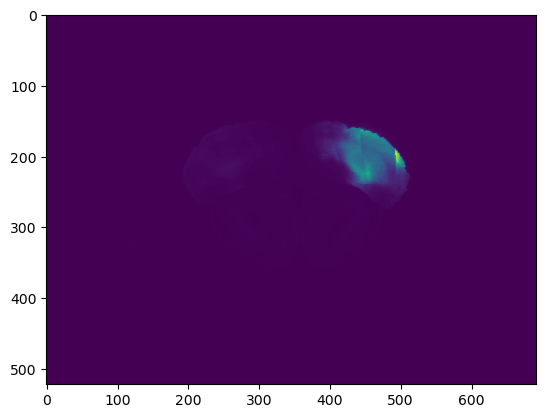

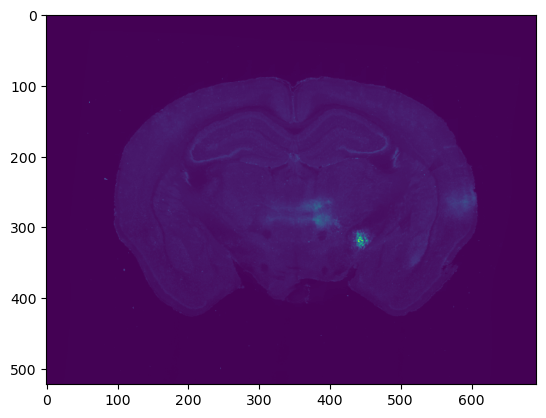

In [14]:
plt.imshow(images[0][25])
plt.show()
plt.imshow(images[0][100])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

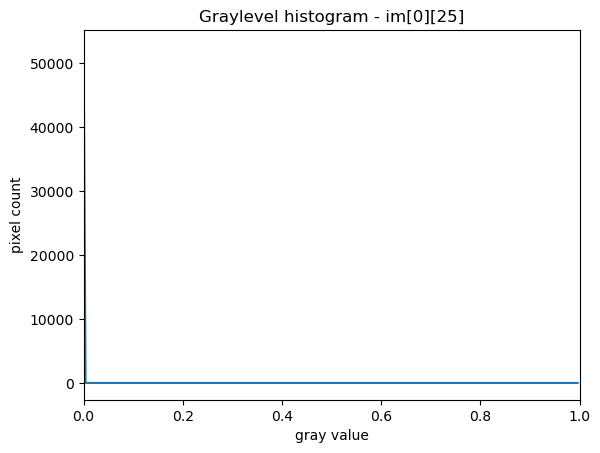

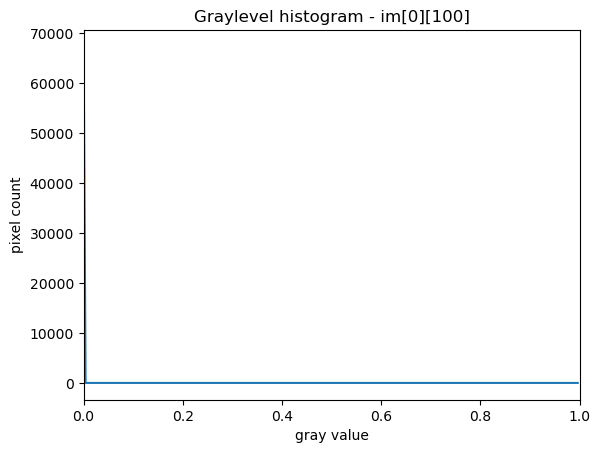

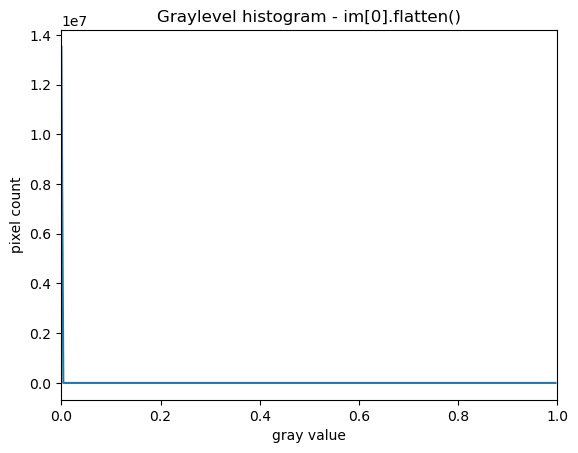

In [16]:
# histograms for raw images

# show the histogram of the raw metadata.shape[0]image
histogram, bin_edges = np.histogram(images[0][25], bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram - im[0][25]")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show

histogram, bin_edges = np.histogram(images[0][100], bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram - im[0][100]")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show

histogram, bin_edges = np.histogram(images[0].flatten(), bins=256, range=(0.0, 1.0))
fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Graylevel histogram - im[0].flatten()")
plt.xlabel("gray value")
plt.ylabel("pixel count")
plt.xlim(0, 1.0)
plt.show

In [9]:
# 256 histogram of raw image
images[0].shape

(201, 522, 692)

In [10]:
from scipy.ndimage import gaussian_filter # for applying gaussian filter for density plots
# use sigma=3, based on what used for contour plots

images_blur = [gaussian_filter(im,sigma=3) for im in images]


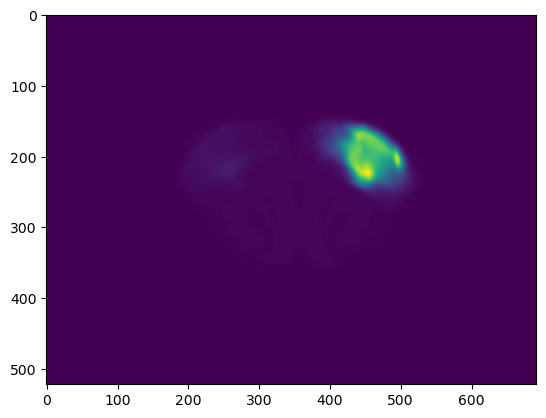

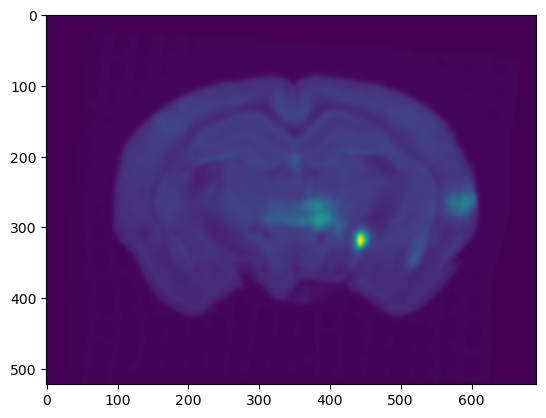

In [13]:
plt.imshow(images_blur[0][25])
plt.show()
plt.imshow(images_blur[0][100])
plt.show()

In [50]:
from scipy.ndimage import median_filter # for applying gaussian filter for density plots

images_med = [median_filter(im) for im in images]
plt.show(images_med[0][25])

RuntimeError: no footprint or filter size provided

: 

In [ ]:
plt.show(images[0][25])

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


NameError: name 'source' is not defined

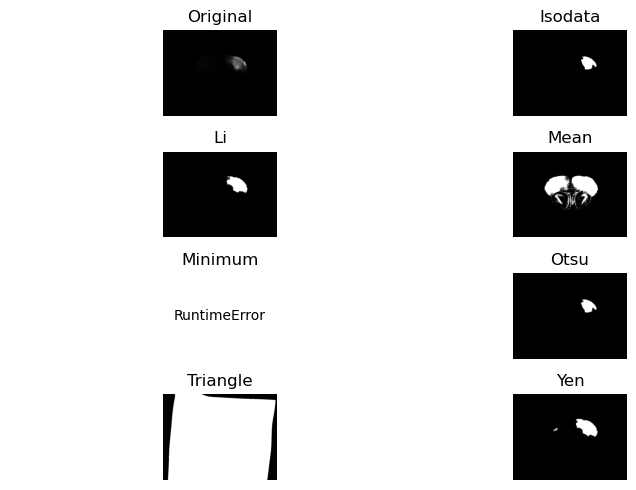

In [17]:
from skimage.filters import try_all_threshold
try_all_threshold(images[0][25], figsize=(8, 5), verbose=True)


skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 800x500 with 8 Axes>,
 array([<Axes: title={'center': 'Original'}>,
        <Axes: title={'center': 'Isodata'}>,
        <Axes: title={'center': 'Li'}>, <Axes: title={'center': 'Mean'}>,
        <Axes: title={'center': 'Minimum'}>,
        <Axes: title={'center': 'Otsu'}>,
        <Axes: title={'center': 'Triangle'}>,
        <Axes: title={'center': 'Yen'}>], dtype=object))

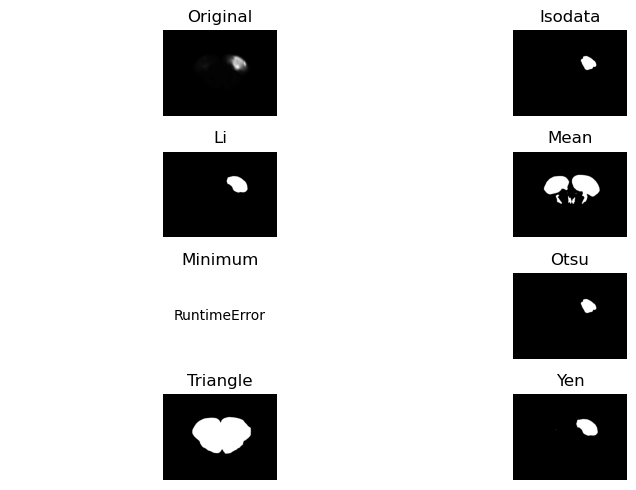

In [18]:
from skimage.filters import try_all_threshold
try_all_threshold(images_blur[0][25], figsize=(8, 5), verbose=True)

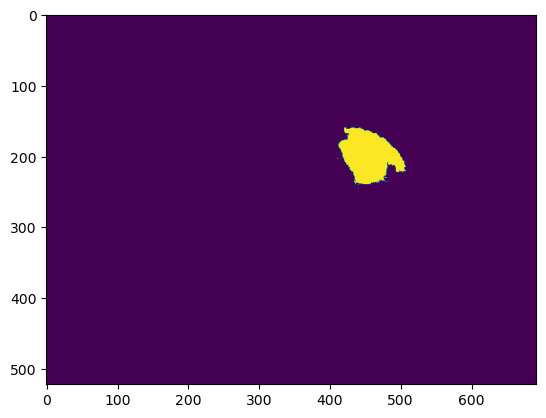

In [24]:
from skimage.filters import threshold_otsu
# get otsu's threshold
test = images[0][25]
thresh = threshold_otsu(test)
binary = test > thresh
plt.imshow(binary)

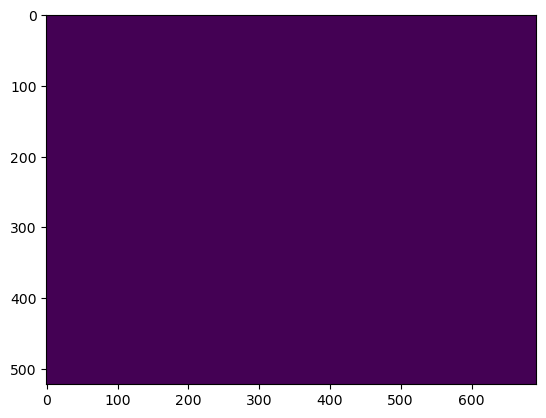

In [41]:
# get otsu's threshold
test = images[0][25]
thresh = threshold_otsu(test)


test3d_mask = images[0] > thresh

# plt.imshow(test3d_mask[50])
test3d_mask[44:] = False
plt.imshow(test3d_mask[50])

In [42]:

viewer = napari.view_image(
        images[0],
        name="raw_image",
        scale=[2.5,1,1],
        opacity=0.75
#         contrast_limits=[[1000, 20000], [1000, 50000]],
        )

viewer.add_image(
        test3d_mask,
        name="inj_thrsh",
        scale=[2.5,1,1],
        colormap="blue",
        blending="additive")

<Image layer 'inj_thrsh' at 0x17bc2df00>

In [26]:
# test whether can just sum across access and contour?
from scipy.ndimage import gaussian_filter # for applying gaussian filter for density plots
test = images[0]
test.shape

(201, 522, 692)

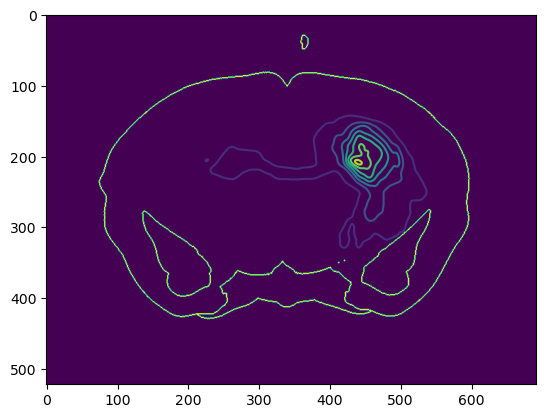

In [28]:
# sum
test_sum = test.sum(axis=0)
# blur
test_blur = gaussian_filter(test_sum, sigma=3)

# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=steg_masks)

# contor
plt.imshow(outline)
plt.contour(test_blur)

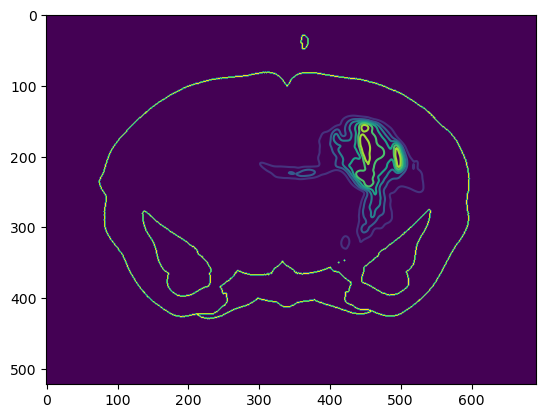

In [29]:
# smax
test_max = test.max(axis=0)
# blur
test_blur = gaussian_filter(test_max, sigma=3)

# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=steg_masks)

# contor
plt.imshow(outline)
plt.contour(test_blur)

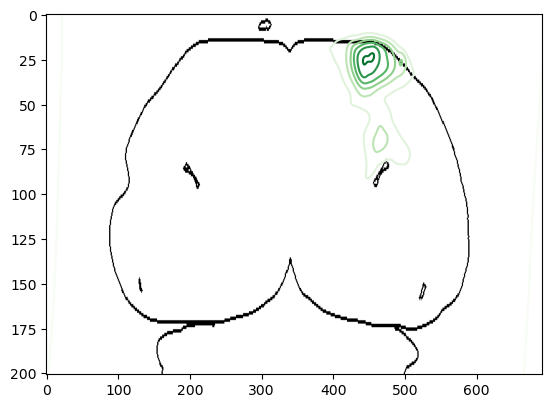

In [43]:
ar = 2.5
transform=(1,0,2)
test_rot = np.transpose(test, transform)
mask_rot = [np.transpose(array, transform) for array in steg_masks]

# sum
test_sum = test_rot.sum(axis=0)
# blur
test_blur = gaussian_filter(test_sum, sigma=3)

# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=mask_rot)

# contor
fig, axs = plt.subplots()
plt.imshow(outline, cmap="Greys")
plt.contour(test_blur, cmap="Greens")
axs.set_aspect(ar)

In [55]:
len(images)

3

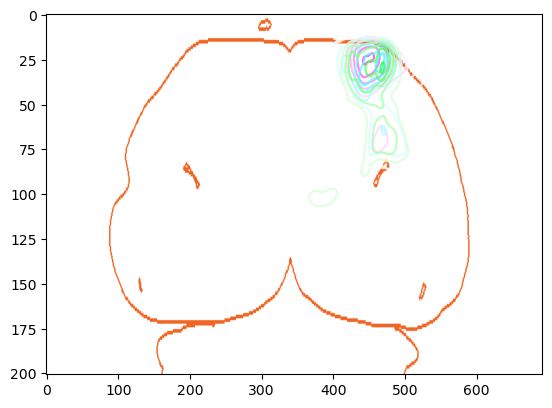

In [95]:
# meta_steg = metadata[metadata["species"]=="STeg"]
# meta_steg_omc = meta_steg[meta_steg["inj_site"]=="OMC"]
# im_steg_omc = [images[i] for i in meta_steg_omc.index]


ar = 2.5
transform=(1,0,2)
im_rot = [np.transpose(im, transform) for im in images]
mask_rot = [np.transpose(array, transform) for array in steg_masks]

# sum
im_sum = [im.sum(axis=0) for im in im_rot]
# blur
im_blur = [gaussian_filter(im, sigma=3) for im in im_sum]
# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=mask_rot)

# plot
colors = [m255_cmp, c255_cmp, g255_cmp]
fig, axs = plt.subplots()
plt.imshow(outline, cmap=orange_cmp)
for i in range(len(im_blur)):
    plt.contour(im_blur[i], vmin=200000, cmap=colors[i], alpha=0.75)
    # plt.colorbar()
axs.set_aspect(ar)


# plot contours of inj sites

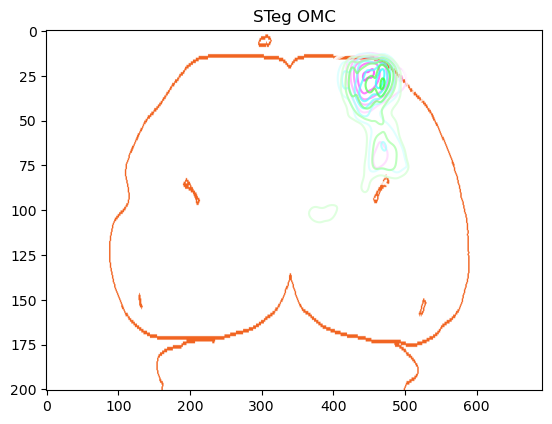

In [104]:
# STeg OMC

meta_steg = metadata[metadata["species"]=="STeg"]
meta_steg_omc = meta_steg[meta_steg["inj_site"]=="OMC"]
im_steg_omc = [images[i] for i in meta_steg_omc.index]


ar = 2.5
transform=(1,0,2)
im_rot = [np.transpose(im, transform) for im in im_steg_omc]
mask_rot = [np.transpose(array, transform) for array in steg_masks]

# sum
im_sum = [im.sum(axis=0) for im in im_rot]
# blur
im_blur = [gaussian_filter(im, sigma=3) for im in im_sum]
# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=mask_rot)

# plot
colors = [m255_cmp, c255_cmp, g255_cmp]
fig, axs = plt.subplots()
plt.imshow(outline, cmap=orange_cmp)
for i in range(len(im_blur)):
    plt.contour(im_blur[i], vmin=200000, cmap=colors[i], alpha=0.75)
    # plt.colorbar()
axs.set_aspect(ar)
plt.title("STeg OMC")
plt.show()


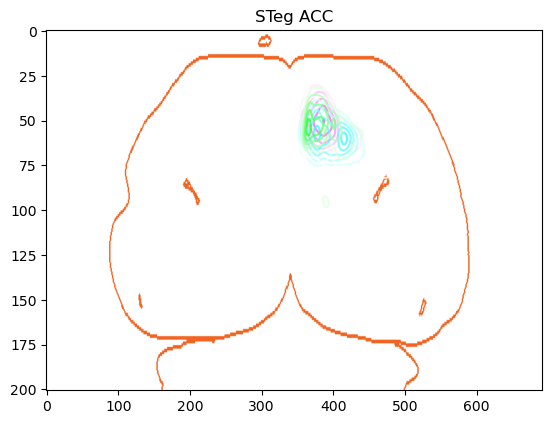

In [105]:
# STeg ACC

meta_steg = metadata[metadata["species"]=="STeg"]
meta_steg_acc = meta_steg[meta_steg["inj_site"]=="ACC"]
im_steg_acc = [images[i] for i in meta_steg_acc.index]


ar = 2.5
transform=(1,0,2)
im_rot = [np.transpose(im, transform) for im in im_steg_acc]
mask_rot = [np.transpose(array, transform) for array in steg_masks]

# sum
im_sum = [im.sum(axis=0) for im in im_rot]
# blur
im_blur = [gaussian_filter(im, sigma=3) for im in im_sum]
# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=mask_rot)

# plot
colors = [m255_cmp, c255_cmp, g255_cmp]
fig, axs = plt.subplots()
plt.imshow(outline, cmap=orange_cmp)
for i in range(len(im_blur)):
    plt.contour(im_blur[i], vmin=200000, cmap=colors[i], alpha=0.75)
    # plt.colorbar()
axs.set_aspect(ar)
plt.title("STeg ACC")
plt.show()


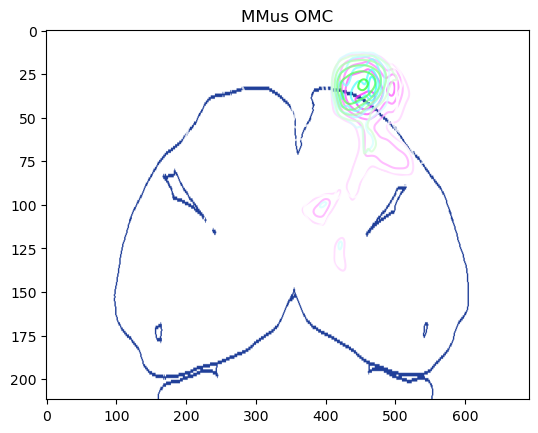

In [109]:
# MMus OMC

meta_mmus = metadata[metadata["species"]=="MMus"]
meta_mmus_omc = meta_mmus[meta_mmus["inj_site"]=="OMC"]
im_mmus_omc = [images[i] for i in meta_mmus_omc.index]


ar = 2.5
transform=(1,0,2)
im_rot = [np.transpose(im, transform) for im in im_mmus_omc]
mask_rot = [np.transpose(array, transform) for array in mmus_masks]

# sum
im_sum = [im.sum(axis=0) for im in im_rot]
# blur
im_blur = [gaussian_filter(im, sigma=3) for im in im_sum]
# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=mask_rot)

# plot
colors = [m255_cmp, c255_cmp, g255_cmp]
fig, axs = plt.subplots()
plt.imshow(outline, cmap=blue_cmp)
for i in range(len(im_blur)):
    plt.contour(im_blur[i], vmin=200000, cmap=colors[i], alpha=0.75)
    # plt.colorbar()
axs.set_aspect(ar)
plt.title("MMus OMC")
plt.show()

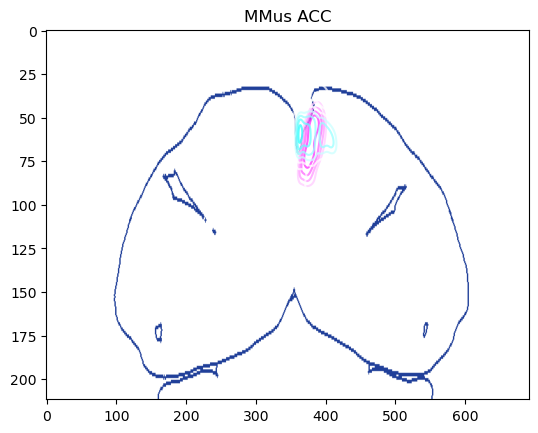

In [110]:
# MMus ACC

meta_mmus = metadata[metadata["species"]=="MMus"]
meta_mmus_acc = meta_mmus[meta_mmus["inj_site"]=="ACC"]
im_mmus_acc = [images[i] for i in meta_mmus_acc.index]


ar = 2.5
transform=(1,0,2)
im_rot = [np.transpose(im, transform) for im in im_mmus_acc]
mask_rot = [np.transpose(array, transform) for array in mmus_masks]

# sum
im_sum = [im.sum(axis=0) for im in im_rot]
# blur
im_blur = [gaussian_filter(im, sigma=3) for im in im_sum]
# outline
outline = make_boundaries(plot_areas=["grey", "CTX", "CP"], mask_list=mask_rot)

# plot
colors = [m255_cmp, c255_cmp, g255_cmp]
fig, axs = plt.subplots()
plt.imshow(outline, cmap=blue_cmp)
for i in range(len(im_blur)):
    plt.contour(im_blur[i], vmin=200000, cmap=colors[i], alpha=0.75)
    # plt.colorbar()
axs.set_aspect(ar)
plt.title("MMus ACC")
plt.show()

# Quantify integrated fluorescence

In [14]:
areas_plot = ["OMCc", "CP", "aud", "AMY", "TH", "HY", "SNr", "SCm", "PG", "PAG", "BS"]

In [17]:
masks_plot = [areas_masks[areas.index(area)] for area in areas_plot]
print(len(areas_plot))
print(len(masks_plot))
masks_plot[0].sum()

11
11


675899.0

In [65]:
# view/inspect filter in napari
vis_area = "BS"
idx = areas_plot.index(vis_area)
viewer.add_image(masks_plot[idx],
                 name=vis_area,
                 scale=[2.5,1,1],
                 blending="Additive",
                 colormap="bop orange",
                 opacity=0.2)

<Image layer 'BS' at 0x17b023820>

In [89]:
# metadata[metadata["inj_site"]=="OMC"]
metadata['path'] = dir_list
meta_omc = metadata[metadata["inj_site"]=="OMC"]
meta_omc = meta_omc.reset_index(drop=True)
meta_omc

,brain,species,inj_site,path
0,OMC_MMus_220119_b0,MMus,OMC,OMC_MMus_220119_b0_aligned_to_STeg_220429_norm...
1,OMC_MMus_220303_b1,MMus,OMC,OMC_MMus_220303_b1_aligned_to_STeg_220429_norm...
2,OMC_MMus_220324_b2,MMus,OMC,OMC_MMus_220324_b2_aligned_to_STeg_220429_norm...
3,OMC_STeg_220208_b0,STeg,OMC,OMC_STeg_220208_b0_aligned_to_STeg_220429_norm...
4,OMC_STeg_220411_b1,STeg,OMC,OMC_STeg_220411_b1_aligned_to_STeg_220429_norm...
5,OMC_STeg_220429_b2,STeg,OMC,OMC_STeg_220429_b2_aligned_to_STeg_220429_norm...


In [90]:
images_omc = []
for i in range(len(meta_omc)):
    images_omc.append(tf.imread(in_path+meta_omc.loc[i,"path"]))

# images_omc[0]


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [93]:
# calculate integrated fluorescence in one area
fluor_df = pd.DataFrame(columns=["area", "Integrated Fluorescence", "Volume_mm3", "brain", "species", "inj_site"])
data = images_omc
meta = meta_omc

for i in range(len(data)):
       for j in range(len(areas_plot)):
              mask = masks_plot[j]
              roi = np.multiply(data[i], mask)
              fluor = roi.sum() * 0.00001 # 10^-6 scaling factor
              vol = mask.sum() * 0.02 # mm^3 per voxel
              row = {"area":areas_plot[j],
                     "Integrated Fluorescence": fluor,
                     "Volume_mm3": vol,
                     "brain":meta.loc[i,"brain"],
                     "species":meta.loc[i,"species"],
                     "inj_site":meta.loc[i,"inj_site"]}
              fluor_df.loc[len(fluor_df.index)] = row


fluor_df


,area,Integrated Fluorescence,Volume_mm3,brain,species,inj_site
0,OMCc,6689.94126,13517.98,OMC_MMus_220119_b0,MMus,OMC
1,CP,16040.92743,24641.08,OMC_MMus_220119_b0,MMus,OMC
2,aud,701.99576,5453.80,OMC_MMus_220119_b0,MMus,OMC
3,AMY,546.86503,4268.00,OMC_MMus_220119_b0,MMus,OMC
4,TH,9696.71295,20709.64,OMC_MMus_220119_b0,MMus,OMC
...,...,...,...,...,...,...
61,SNr,309.06559,935.62,OMC_STeg_220429_b2,STeg,OMC
62,SCm,1519.92101,6995.60,OMC_STeg_220429_b2,STeg,OMC
63,PG,164.49987,580.52,OMC_STeg_220429_b2,STeg,OMC
64,PAG,1025.60532,4985.72,OMC_STeg_220429_b2,STeg,OMC


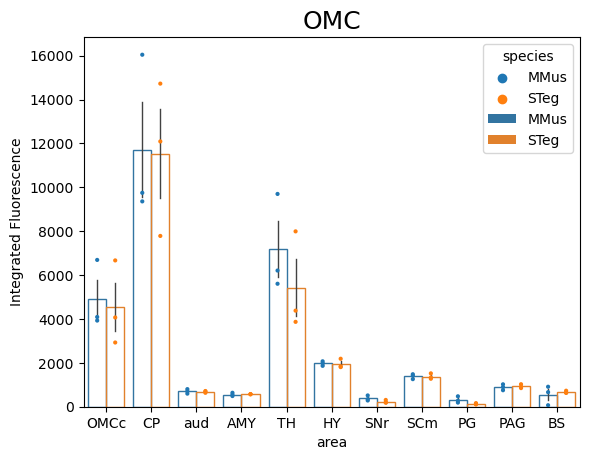

In [95]:
# make dot plot
dot_bar_plot(fluor_df, title="OMC", xaxis="area", yaxis="Integrated Fluorescence", hueaxis="species")
plt.show()

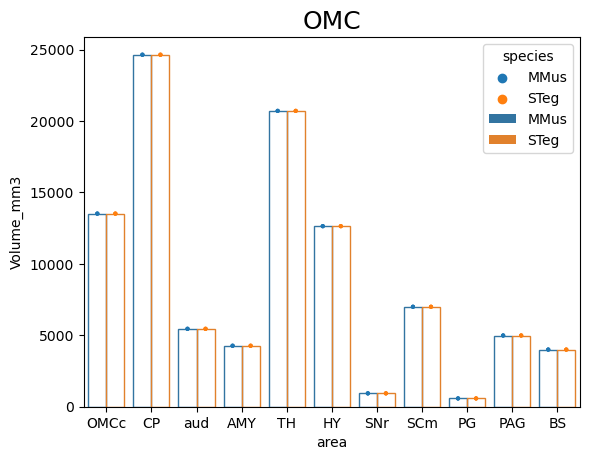

In [98]:
# plot volume
dot_bar_plot(fluor_df, title="OMC", xaxis="area", yaxis="Volume_mm3", hueaxis="species")
plt.show()

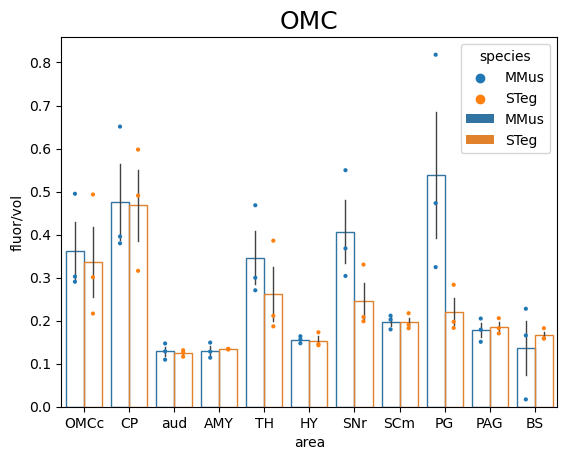

In [100]:
# fluor/vol
fluor_df['fluor/vol'] = fluor_df["Integrated Fluorescence"]/fluor_df["Volume_mm3"]
dot_bar_plot(fluor_df, title="OMC", xaxis="area", yaxis="fluor/vol", hueaxis="species")
plt.show()

In [109]:
sns.color_palette("tab10")[1]

(1.0, 0.4980392156862745, 0.054901960784313725)

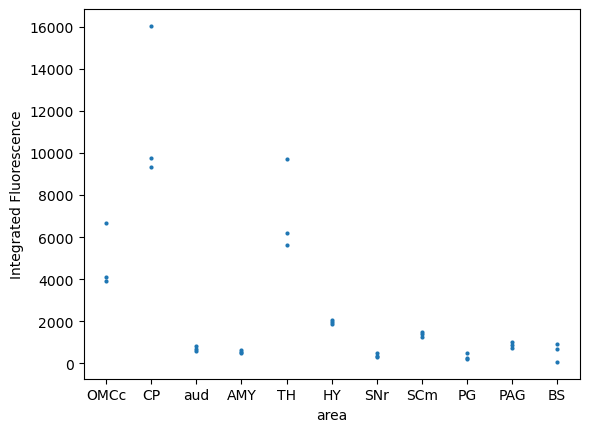

In [127]:
# scatterplot
fl_st = fluor_df[fluor_df["species"]=="STeg"]
fl_mm = fluor_df[fluor_df["species"]=="MMus"]
# sns.stripplot(fl_st, y="area", x="Integrated Fluorescence", 
                # jitter=False, palette=["orange"], size=3)
sns.stripplot(fl_mm, x="area", y="Integrated Fluorescence", 
                jitter=False, size=3)
# sns.pointplot(test, y="area", x="Integrated Fluorescence", palette=["orange"])
plt.show()

<Axes: xlabel='Integrated Fluorescence', ylabel='area'>

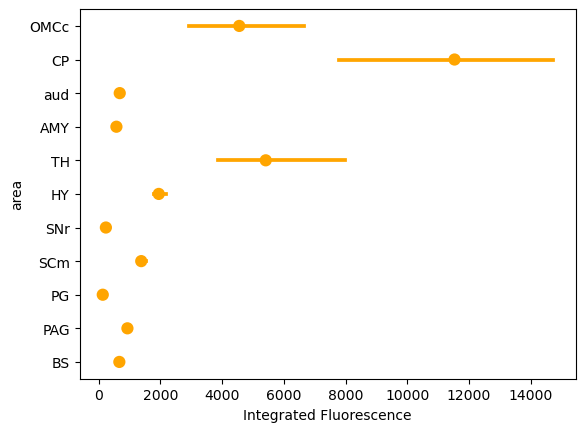

In [121]:
sns.pointplot(
    test, y="area", x="Integrated Fluorescence", palette=["orange"]
)

In [184]:
print(list(st_mean.index))
print(list(mm_mean.index))

['AMY', 'BS', 'CP', 'HY', 'OMCc', 'PAG', 'PG', 'SCm', 'SNr', 'TH', 'aud']
['AMY', 'BS', 'CP', 'HY', 'OMCc', 'PAG', 'PG', 'SCm', 'SNr', 'TH', 'aud']


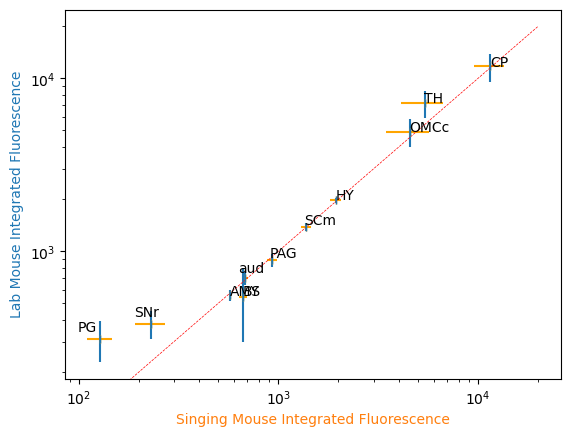

In [209]:
st_mean = fl_st.groupby("area").mean(numeric_only=True)
st_se = fl_st.groupby("area").sem(numeric_only=True)

mm_mean = fl_mm.groupby("area").mean(numeric_only=True)
mm_se = fl_mm.groupby("area").sem(numeric_only=True)

plt.errorbar(st_mean['Integrated Fluorescence'], mm_mean['Integrated Fluorescence'], 
            xerr=st_se['Integrated Fluorescence'], fmt='|', color="orange")
plt.errorbar(st_mean['Integrated Fluorescence'], mm_mean['Integrated Fluorescence'], 
            yerr=mm_se['Integrated Fluorescence'], fmt='|')
# add labels
labels = list(st_mean.index)
for i in range(len(labels)):
    plt.annotate(labels[i], (st_mean['Integrated Fluorescence'][i]-i*5, mm_mean['Integrated Fluorescence'][i]+i*5))
# plt.scatter(st_mean['Integrated Fluorescence'], mm_mean['Integrated Fluorescence'], color="black", s=5)
# plot y=x line
x = np.linspace(0,20000, 5)
y = x
plt.plot(x, y, color='red'
         , linestyle="--", linewidth=0.5)
plt.xlabel("Singing Mouse Integrated Fluorescence", color="tab:orange")
plt.ylabel("Lab Mouse Integrated Fluorescence", color="tab:blue")
plt.xscale("log")
plt.yscale("log")



plt.show()


In [210]:
metadata

,brain,species,inj_site,path
0,ACC_MMus_230403_b1,MMus,ACC,ACC_MMus_230403_b1_aligned_to_STeg_220429_norm...
1,ACC_MMus_230404_b2,MMUs,ACC,ACC_MMus_230404_b2_aligned_to_STeg_220429_norm...
2,ACC_STeg_230308_b1,STeg,ACC,ACC_STeg_230308_b1_aligned_to_STeg_220429_norm...
3,ACC_STeg_230322_b2,STeg,ACC,ACC_STeg_230322_b2_aligned_to_STeg_220429_norm...
4,ACC_STeg_230501_b3,STeg,ACC,ACC_STeg_230501_b3_aligned_to_STeg_220429_norm...
5,OMC_MMus_220119_b0,MMus,OMC,OMC_MMus_220119_b0_aligned_to_STeg_220429_norm...
6,OMC_MMus_220303_b1,MMus,OMC,OMC_MMus_220303_b1_aligned_to_STeg_220429_norm...
7,OMC_MMus_220324_b2,MMus,OMC,OMC_MMus_220324_b2_aligned_to_STeg_220429_norm...
8,OMC_STeg_220208_b0,STeg,OMC,OMC_STeg_220208_b0_aligned_to_STeg_220429_norm...
9,OMC_STeg_220411_b1,STeg,OMC,OMC_STeg_220411_b1_aligned_to_STeg_220429_norm...
